In [49]:
import pandas as pd
import xgboost as xgb
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [50]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [52]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_145F.csv
1   3C-EURUSD_FULL_1D_21F.csv
2   3C-EURUSD_FULL_1D_45F.csv
3   3C-EURUSD_FULL_1D_70F.csv
4   3C-EURUSD_FULL_1H_145F.csv
5   3C-EURUSD_FULL_1H_45F.csv
6   3C-EURUSD_FULL_1H_70F.csv
7   5C-EURUSD_FULL_1D_21F.csv
8   5C-EURUSD_FULL_1D_45F.csv
9   C-EURUSD_FULL_1D_21F.csv
10   C-EURUSD_FULL_1H_25F.csv
11   C-EURUSD_FULL_1H_45F.csv
12   C-EURUSD_FULL_1H_54F.csv


In [53]:
#SELECT an INDEX 
INDX = 6

CLASS_NUMBER = '3C'
MODEL_TYPE = 'XGBOOST'
FRECUENCIA = '1H'
TARGET_NAME = "Class"
ID = '01'

PROFUNDIDAD = 0

TEST_SIZE = .20
VAL_SIZE = .10

In [54]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)
data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,Class
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,-1.0
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0


In [55]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       'AQM_Pct_Range_Close_diff', 'AQM_Pct_Range_Close', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_100', 'MA_Close_150',
       'MA_Close_175', 'MA_Close_200', 'EMA_Close_5', 'Momentum_1',
       'Momentum_2', 'Momentum_3', 'Momentum_4', 'Momentum_5', 'Momentum_6',
       'Momentum_7', 'Momentum_8', 'Momentum_9', 'Momentum_10', 'Momentum_11',
       'Momentum_12', 'Momentum_13', 'Momentum_14', 'Momentum_15',
       'Momentum_25', 'Momentum_36', 'Momentum_50', 'Momentum_75',
       'Momentum_80', 'Momentum_100', 'rsi_5', 'rsi_14', 'rsi_25', 'rsi_50',
       'rsi_70', 'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'SO_k',
       'SO%k1', 'SO%d2', 'Trix_2', 'Trix_5', 'Trix_15', 'Trix_25', 'Trix_50',
       'Trix_75', 'MACD_5_25', 'MACDsign_5_25', 

In [56]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
data = data.drop(['weekday'], axis = 1)
data = data.drop(['Open_Bid'], axis = 1)
data = data.drop(['High_Bid'], axis = 1)
data = data.drop(['Low_Bid'], axis = 1)
data = data.drop(['Close_Bid'], axis = 1)



data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,Class
0,1.25950,1.25960,1.25826,1.25910,6654.2002,7823.1001,0.00010,0.000000,0.000000,6654.2002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
1,1.25958,1.25960,1.25947,1.25951,660.6000,461.4000,0.00010,0.000326,0.000326,7314.8002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0
2,1.25955,1.25962,1.25944,1.25951,2091.0000,1839.8000,0.00015,0.000000,-0.000326,9405.8002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,-1.0
3,1.25950,1.25965,1.25834,1.25869,10003.0996,13349.2998,0.00015,-0.000651,-0.000651,19408.8998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,1.0
4,1.25908,1.25960,1.25843,1.25950,7603.3999,8422.5000,0.00010,0.000644,0.001295,27012.2997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076,0.0


In [57]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

102514
62


In [58]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/XGBoost/')
#print('Location to Save: ', source_data)
FILENAME = CLASS_NUMBER + '_' + FRECUENCIA + '_' + str(NUM_FEATURES) + 'F_' + str(SIZE) + 'Size_' + MODEL_TYPE +  '_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.bst'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  3C_1D_62F_102514Size_XGBOOST_Class_01
File Name Model: 3C_1D_62F_102514Size_XGBOOST_Class_01.bst


In [59]:
train_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Train.csv')
print(train_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_62F_102514Size_XGBOOST_Class_01_Train.csv


In [60]:
test_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Test.csv')
print(test_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_62F_102514Size_XGBOOST_Class_01_Test.csv


In [61]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 1.0    34610
-1.0    34466
 0.0    33438
Name: Class, dtype: int64


In [62]:
data = data.drop(columns=['Class'])

In [63]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [64]:
data

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,Trix_2,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.25950,1.25960,1.25826,1.25910,6654.2002,7823.1001,0.00010,0.000000,0.000000,6.654200e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
1,1.25958,1.25960,1.25947,1.25951,660.6000,461.4000,0.00010,0.000326,0.000326,7.314800e+03,...,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
2,1.25955,1.25962,1.25944,1.25951,2091.0000,1839.8000,0.00015,0.000000,-0.000326,9.405800e+03,...,0.000088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
3,1.25950,1.25965,1.25834,1.25869,10003.0996,13349.2998,0.00015,-0.000651,-0.000651,1.940890e+04,...,-0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
4,1.25908,1.25960,1.25843,1.25950,7603.3999,8422.5000,0.00010,0.000644,0.001295,2.701230e+04,...,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,1.10998,1.11070,1.10862,1.10998,12120.8398,11340.1201,0.00001,0.000009,-0.000739,2.123164e+09,...,-0.000073,-0.000202,0.000236,0.000237,0.000147,0.000093,0.000658,0.001882,-0.001224,25.246677
102510,1.10997,1.11094,1.10982,1.11071,4646.7427,4041.1875,0.00035,0.000658,0.000649,2.123169e+09,...,0.000193,-0.000172,0.000219,0.000233,0.000149,0.000094,0.000735,0.001653,-0.000918,25.191516
102511,1.11213,1.11217,1.11136,1.11141,417.4906,385.2600,0.00011,0.000630,-0.000027,2.123169e+09,...,0.000393,-0.000105,0.000204,0.000229,0.000150,0.000096,0.000943,0.001511,-0.000568,25.140431
102512,1.11138,1.11148,1.11028,1.11123,4549.1167,4784.7334,0.00005,-0.000162,-0.000792,2.123174e+09,...,0.000278,-0.000047,0.000190,0.000225,0.000152,0.000097,0.001000,0.001409,-0.000408,25.118420


In [65]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index([], dtype='object')


In [66]:
pd_old_rows.shape

(0, 0)

In [67]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(102514, 61)

In [68]:
data.head(30)

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,Trix_2,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.25950,1.25960,1.25826,1.25910,6654.2002,7823.1001,0.00010,0.000000,0.000000,6654.2002,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
1,1.25958,1.25960,1.25947,1.25951,660.6000,461.4000,0.00010,0.000326,0.000326,7314.8002,...,0.000137,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
2,1.25955,1.25962,1.25944,1.25951,2091.0000,1839.8000,0.00015,0.000000,-0.000326,9405.8002,...,0.000088,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
3,1.25950,1.25965,1.25834,1.25869,10003.0996,13349.2998,0.00015,-0.000651,-0.000651,19408.8998,...,-0.000150,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
4,1.25908,1.25960,1.25843,1.25950,7603.3999,8422.5000,0.00010,0.000644,0.001295,27012.2997,...,0.000027,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
5,1.25907,1.25960,1.25825,1.25955,10862.5996,12512.2002,0.00010,0.000040,-0.000604,37874.8993,...,0.000089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
6,1.25914,1.25960,1.25482,1.25948,10160.4004,13549.9004,0.00016,-0.000056,-0.000095,48035.2997,...,0.000058,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
7,1.25938,1.25950,1.24698,1.25910,13008.2002,14200.0000,0.00010,-0.000302,-0.000246,61043.4999,...,-0.000060,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
8,1.25900,1.25953,1.25726,1.25907,5518.8999,6796.0000,0.00020,-0.000024,0.000278,66562.3998,...,-0.000083,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076
9,1.25915,1.25953,1.25864,1.25917,7611.2002,9450.2998,0.00014,0.000079,0.000103,74173.6000,...,-0.000037,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24.237076


In [69]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [70]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,Trix_2,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.25950,1.25960,1.25826,1.25910,6654.2002,7823.1001,0.00010,0.000000,0.000000,6654.2002,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076
1,1.25958,1.25960,1.25947,1.25951,660.6000,461.4000,0.00010,0.000326,0.000326,7314.8002,...,0.000137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076
2,1.25955,1.25962,1.25944,1.25951,2091.0000,1839.8000,0.00015,0.000000,-0.000326,9405.8002,...,0.000088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076
3,1.25950,1.25965,1.25834,1.25869,10003.0996,13349.2998,0.00015,-0.000651,-0.000651,19408.8998,...,-0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076
4,1.25908,1.25960,1.25843,1.25950,7603.3999,8422.5000,0.00010,0.000644,0.001295,27012.2997,...,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.237076


In [71]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Bid', 'Spread',
       'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       'AQM_Pct_Range_Close_diff', 'AQM_Pct_Range_Close', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_100', 'MA_Close_150',
       'MA_Close_175', 'MA_Close_200', 'Momentum_1', 'Momentum_2',
       'Momentum_3', 'Momentum_4', 'Momentum_5', 'Momentum_6', 'Momentum_7',
       'Momentum_8', 'Momentum_9', 'Momentum_10', 'Momentum_11', 'Momentum_12',
       'Momentum_13', 'Momentum_14', 'Momentum_15', 'Momentum_25',
       'Momentum_36', 'Momentum_50', 'Momentum_75', 'Momentum_80',
       'Momentum_100', 'rsi_5', 'rsi_14', 'rsi_25', 'rsi_50', 'rsi_70',
       'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'SO_k', 'SO%k1',
       'SO%d2', 'Trix_2', 'Trix_5', 'Trix_15', 'Trix_25', 'Trix_50', 'Trix_75',
       'MACD_5_25', 'MACDsign_5_25', 'MACDdiff_5_25', 'Mass_Index_25_8_9'],
      dtype='object')

In [72]:
# Split the data into train / test sets
x,y = data,labels
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= TEST_SIZE, random_state=42, shuffle=False)

In [73]:
print(x_train.shape)
print(x_train)

(82011, 61)
          Open     High      Low    Close      Volume  Volume_Bid   Spread  \
0      1.25950  1.25960  1.25826  1.25910   6654.2002   7823.1001  0.00010   
1      1.25958  1.25960  1.25947  1.25951    660.6000    461.4000  0.00010   
2      1.25955  1.25962  1.25944  1.25951   2091.0000   1839.8000  0.00015   
3      1.25950  1.25965  1.25834  1.25869  10003.0996  13349.2998  0.00015   
4      1.25908  1.25960  1.25843  1.25950   7603.3999   8422.5000  0.00010   
...        ...      ...      ...      ...         ...         ...      ...   
82006  1.05959  1.06053  1.05952  1.06034   8132.6001   7435.0298  0.00002   
82007  1.06034  1.06060  1.05967  1.05991   6679.8901   7097.7202  0.00001   
82008  1.05991  1.06017  1.05953  1.05959   6488.6401   4546.3901  0.00002   
82009  1.05960  1.05992  1.05959  1.05989   2170.9800   1748.8800  0.00010   
82010  1.05989  1.05998  1.05930  1.05964   1614.4100   1893.7000  0.00005   

       Pct_Range_Close  Pct_Range_Close_diff       

In [74]:
print(x_test.shape)
x_test.reset_index(drop=True, inplace=True)
print(x_test)

(20503, 61)
          Open     High      Low    Close      Volume  Volume_Bid   Spread  \
0      1.05961  1.05993  1.05931  1.05991   2694.9900   2357.7500  0.00004   
1      1.05990  1.06094  1.05964  1.06006   4862.1401   5241.4702  0.00003   
2      1.06004  1.06063  1.05933  1.05959   5468.6602   5574.6099  0.00003   
3      1.05960  1.05989  1.05915  1.05985   4151.4600   4016.8601  0.00001   
4      1.05986  1.06043  1.05986  1.06043   4309.1099   4429.1699  0.00003   
...        ...      ...      ...      ...         ...         ...      ...   
20498  1.10998  1.11070  1.10862  1.10998  12120.8398  11340.1201  0.00001   
20499  1.10997  1.11094  1.10982  1.11071   4646.7427   4041.1875  0.00035   
20500  1.11213  1.11217  1.11136  1.11141    417.4906    385.2600  0.00011   
20501  1.11138  1.11148  1.11028  1.11123   4549.1167   4784.7334  0.00005   
20502  1.11123  1.11199  1.11119  1.11158   5159.8101   4047.4900  0.00002   

       Pct_Range_Close  Pct_Range_Close_diff       

In [75]:
print(y_test.shape)
print(y_test)

(20503,)
[ 0. -1.  0. ...  0.  1.  0.]


In [76]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# Save the model so we can deploy it
#bst.save_model(source_data_toSave + file_name_toSave)

In [78]:
#bst_loaded = xgb.Booster({'nthread': 4})  # init model
#bst_loaded.load_model(source_data_toSave + file_name_toSave)  # load data

In [79]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.36458079305467495 



In [80]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[0.69916979 0.21084044 0.01902439]
 [0.82874817 0.36845311 0.01528455]
 [0.68093765 0.22070646 0.02520325]]


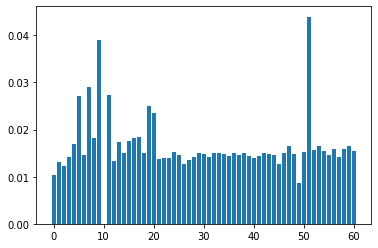

In [81]:

#print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

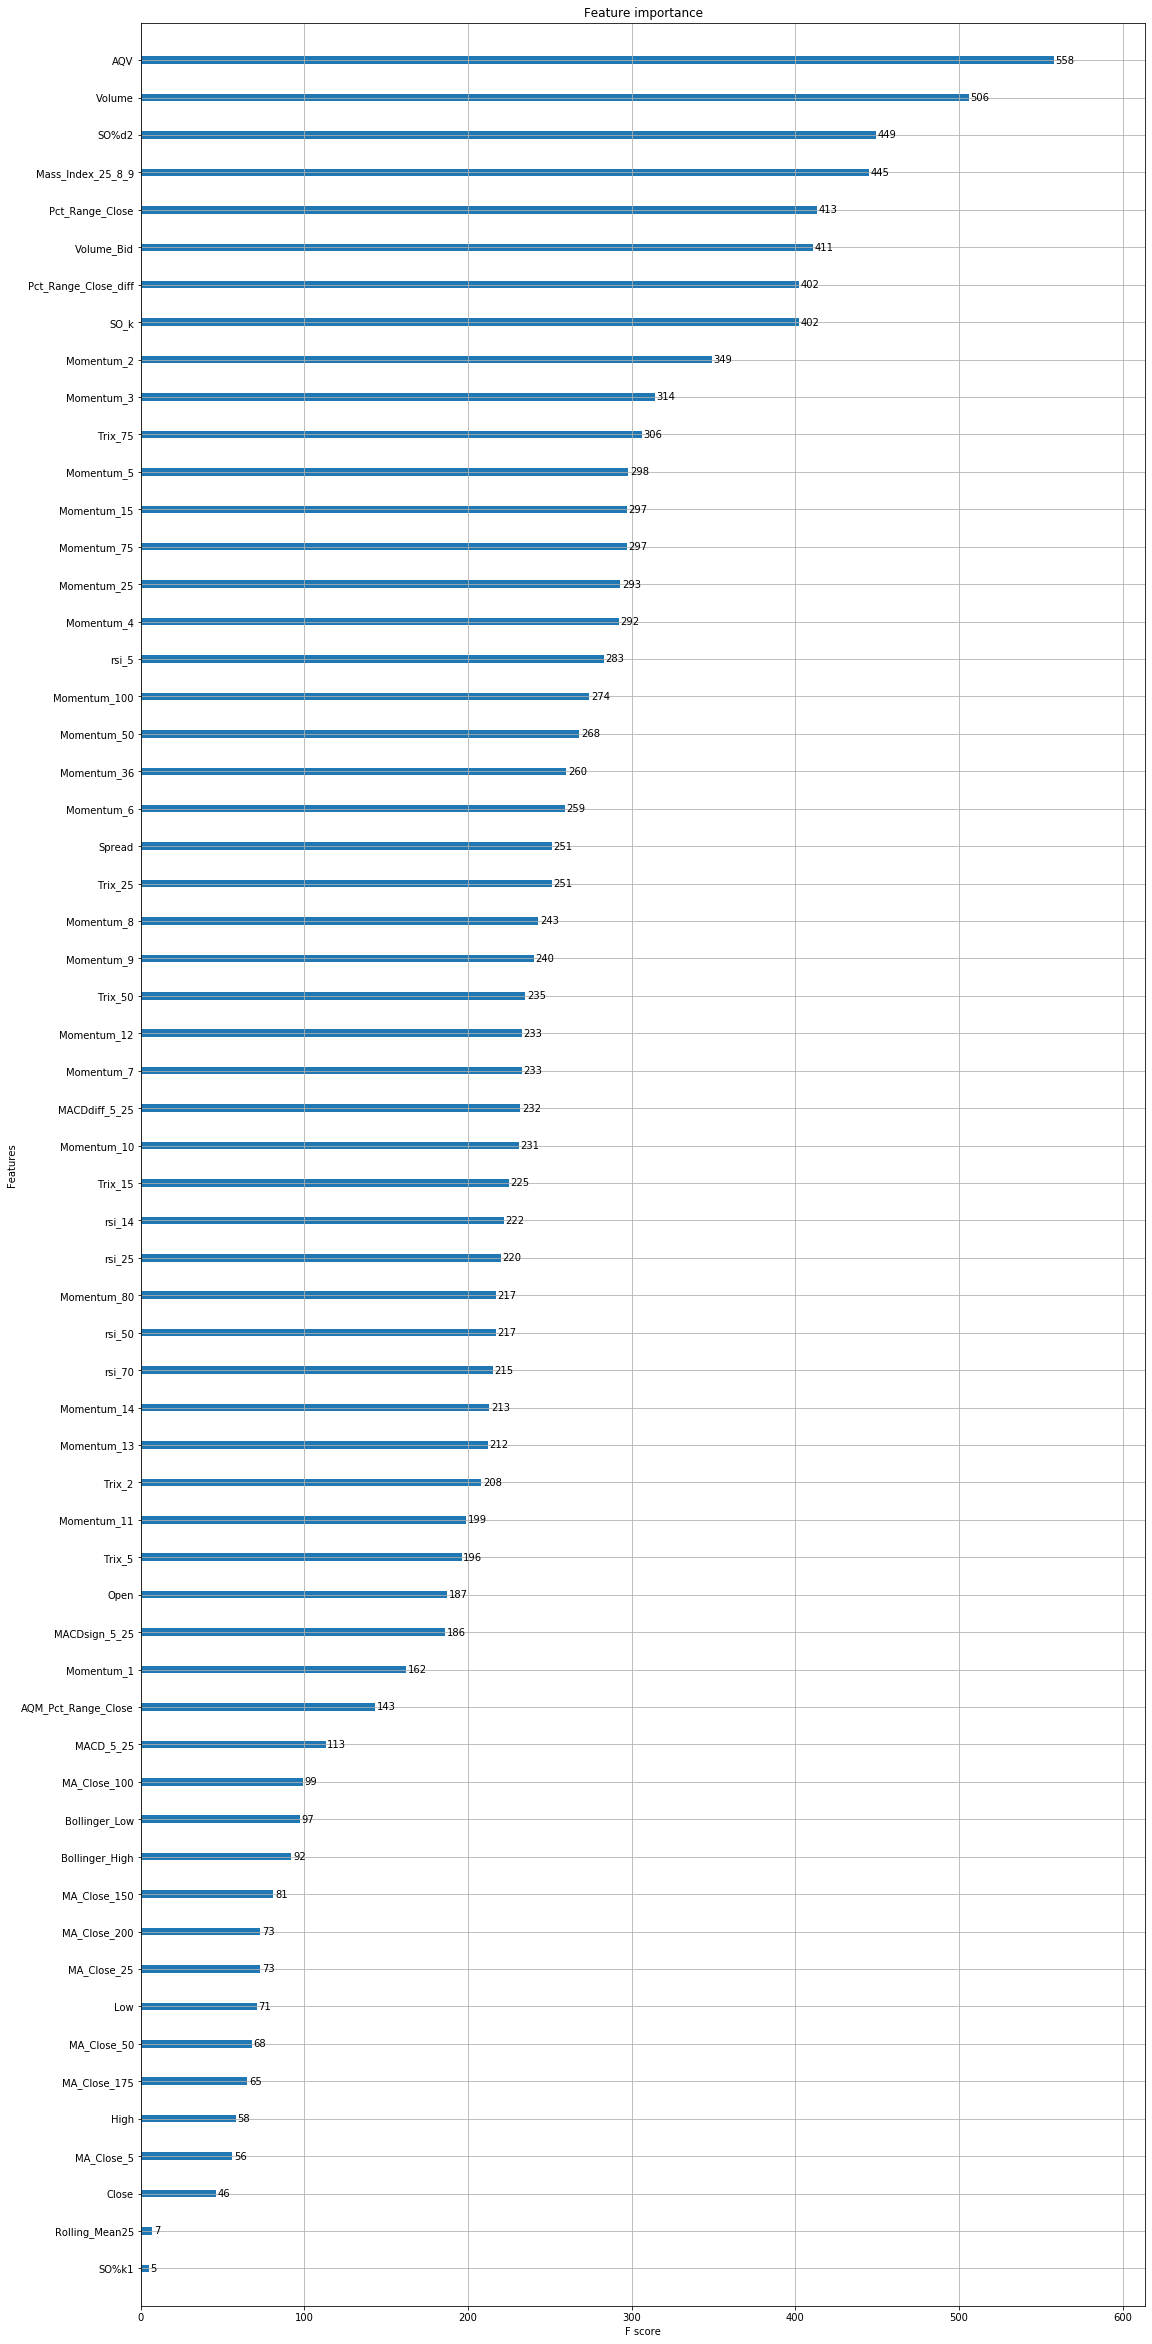

In [82]:
# plot feature importance
ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 42)
pyplot.show()

In [ ]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None
 
# split data into X and y
x,y = data,labels
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= TEST_SIZE, random_state=42,shuffle=False)

# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

### Predict Train Dataset

In [83]:
y_train_pred = bst.predict(x_train)
#x_train,x_test,y_train,y_test

In [84]:
y_train_real = pd.DataFrame({'Real_Class': y_train})
y_train_pred_pd = pd.DataFrame({'Predicted_Class': y_train_pred})
print('y_train_real ',y_train_real.shape)
print('y_train_pred_pd ',y_train_pred_pd.shape)
x_train_real = pd.concat([x_train,y_train_real], axis=1, sort=False)
print('x_train_real ',x_train_real.shape)
x_train = pd.concat([x_train_real,y_train_pred_pd], axis=1, sort=False)
print('x_train ', x_train.shape)

y_train_real  (82011, 1)
y_train_pred_pd  (82011, 1)
x_train_real  (82011, 62)
x_train  (82011, 63)


In [85]:
#Save
x_train.to_csv(train_dataset_results_csv, header=True, index=False)
print(train_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_62F_102514Size_XGBOOST_Class_01_Train.csv


### Predict Test Dataset

In [86]:
x_test.shape
x_test

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,Trix_2,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.05961,1.05993,1.05931,1.05991,2694.9900,2357.7500,0.00004,0.000255,0.000491,1.912954e+09,...,0.000015,-0.000201,-0.000120,-0.000098,-0.000085,-0.000069,-0.001649,-0.001593,-0.000055,23.755415
1,1.05990,1.06094,1.05964,1.06006,4862.1401,5241.4702,0.00003,0.000142,-0.000113,1.912958e+09,...,0.000079,-0.000154,-0.000124,-0.000100,-0.000086,-0.000070,-0.001481,-0.001571,0.000090,23.697323
2,1.06004,1.06063,1.05933,1.05959,5468.6602,5574.6099,0.00003,-0.000443,-0.000585,1.912964e+09,...,-0.000060,-0.000129,-0.000127,-0.000102,-0.000086,-0.000070,-0.001460,-0.001549,0.000089,23.731674
3,1.05960,1.05989,1.05915,1.05985,4151.4600,4016.8601,0.00001,0.000245,0.000689,1.912968e+09,...,-0.000013,-0.000103,-0.000129,-0.000103,-0.000087,-0.000071,-0.001343,-0.001507,0.000165,23.788727
4,1.05986,1.06043,1.05986,1.06043,4309.1099,4429.1699,0.00003,0.000547,0.000302,1.912972e+09,...,0.000172,-0.000059,-0.000128,-0.000104,-0.000087,-0.000071,-0.001088,-0.001424,0.000336,23.839250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20498,1.10998,1.11070,1.10862,1.10998,12120.8398,11340.1201,0.00001,0.000009,-0.000739,2.123164e+09,...,-0.000073,-0.000202,0.000236,0.000237,0.000147,0.000093,0.000658,0.001882,-0.001224,25.246677
20499,1.10997,1.11094,1.10982,1.11071,4646.7427,4041.1875,0.00035,0.000658,0.000649,2.123169e+09,...,0.000193,-0.000172,0.000219,0.000233,0.000149,0.000094,0.000735,0.001653,-0.000918,25.191516
20500,1.11213,1.11217,1.11136,1.11141,417.4906,385.2600,0.00011,0.000630,-0.000027,2.123169e+09,...,0.000393,-0.000105,0.000204,0.000229,0.000150,0.000096,0.000943,0.001511,-0.000568,25.140431
20501,1.11138,1.11148,1.11028,1.11123,4549.1167,4784.7334,0.00005,-0.000162,-0.000792,2.123174e+09,...,0.000278,-0.000047,0.000190,0.000225,0.000152,0.000097,0.001000,0.001409,-0.000408,25.118420


In [87]:
y_test_pred = bst.predict(x_test)
#x_train,x_test,y_train,y_test

In [88]:
y_test_pred.shape

(20503,)

In [89]:
y_test_pred

array([ 0.,  1.,  0., ..., -1., -1., -1.])

In [90]:
y_test_real = pd.DataFrame({'Real_Class': y_test})
y_test_pred_pd = pd.DataFrame({'Predicted_Class': y_test_pred})
print('y_test_real ',y_test_real.shape)
print('y_test_pred_pd ',y_test_pred_pd.shape)
x_test_real = pd.concat([x_test,y_test_real], axis=1, sort=False)
print('x_test_real ',x_test_real.shape)
x_test = pd.concat([x_test_real,y_test_pred_pd], axis=1, sort=False)
print('x_test ', x_test.shape)

y_test_real  (20503, 1)
y_test_pred_pd  (20503, 1)
x_test_real  (20503, 62)
x_test  (20503, 63)


In [91]:

print(x_test['Predicted_Class'].isnull().sum())
#DATASET_FULL.fillna(method='backfill', inplace=True)

0


In [92]:
#Save
x_test.to_csv(test_dataset_results_csv, header=True, index=False)
print(test_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/3C_1D_62F_102514Size_XGBOOST_Class_01_Test.csv
